
\begin{align*}
    \beta^{new} =& (\boldsymbol{X}^T \boldsymbol{W} \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{W} \boldsymbol{z} \\
    \boldsymbol{z} =& \boldsymbol{X} \beta^{old} + \boldsymbol{W}^{-1} (\boldsymbol{y} - \boldsymbol{p})
\end{align*}

ただし
\begin{align*}
    \boldsymbol{W} =& \left( \begin{matrix}
        p(x_1;\beta)(1 - p(x_1; \beta)) & 0 & \cdots & 0 \\
        0 &p(x_2;\beta)(1 - p(x_2; \beta)) & \cdots & 0 \\
        \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & \cdots & p(x_N;\beta)(1 - p(x_N; \beta))
        \end{matrix} \right) \\
    \boldsymbol{p} =& \left(\begin{matrix}
        p(x_1;\beta) \\
        p(x_2;\beta) \\
        \vdots \\
        p(x_N;\beta)
        \end{matrix} \right)
\end{align*}


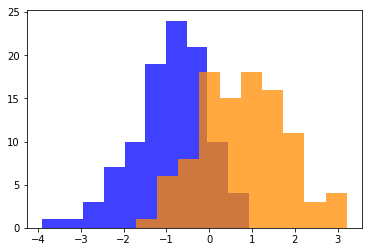

5
1.2744017242113901e-08
[[0.26641338]
 [2.30171855]]


In [44]:
# 1次元の場合

import numpy as np;
import matplotlib.pyplot as plt;

N = 100;
dim = 1;
MaxIter = 1e10;
epsilon = 1e-5;

mu0 = -1;
mu1 = 1;

# creatting data

sigma = 1;
X0 = sigma*np.random.randn (N)+mu0;
X1 = sigma*np.random.randn (N)+mu1;

plt.hist (X0, bins=10, facecolor='b', alpha=0.75);
plt.hist (X1, bins=10, facecolor='darkorange', alpha=0.75);
plt.show ();


X = np.c_[np.ones((2*N,1)), np.r_[X0, X1]];
Y = np.r_[np.zeros((N,1)), np.ones((N,1))];
beta = np.ones ((dim+1,1));
t = 0;
while t<MaxIter:
    tmp = np.exp (-beta.T.dot (X.T)).reshape (2*N, 1);
    p = 1 / (1+tmp);
    w = p * (np.ones_like (p) - p);
    W = np.diag (w.reshape (2*N,));
    W_inv = np.diag (1 / w.reshape (2*N,));
    Z = X.dot (beta) + W_inv.dot (Y-p);
    beta_new = np.linalg.inv (X.T.dot (W). dot (X)). dot (X.T). dot(W). dot(Z);
    if (np.linalg.norm (beta_new-beta,ord=2) < epsilon):
        print (t);
        print (np.linalg.norm (beta_new-beta,ord=2));
        break;
     
    
    t += 1;
    beta = beta_new;



print (beta); # beta[0,0] = 0 であればok
#x = np.linspace (-6,6);  
#plt.plot (x, - (beta[0,0] + beta[1,0] * x) / beta[2,0]);

8
1.1747284726496573e-10
[[-3.55879792]
 [-2.81042766]
 [ 3.74573602]]


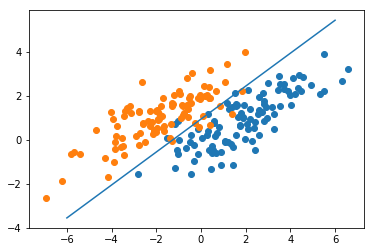

In [42]:
# 2次元の場合
# 反復重み付き最小二乗法はうまくいかなかったので
# 普通にNewton-Raphson法を用いた。

import numpy as np;
import matplotlib.pyplot as plt;
from numpy.linalg import LinAlgError;
from sklearn.linear_model import LogisticRegression;

N = 100;
dim = 2;
MaxIter = 1e3;
epsilon = 1e-5;

mu0 = np.array ([[2],[1]]);
mu1 = np.array ([[-2],[1]]);

# creating data
P = np.array ([[0.5, np.sqrt(3)/2], [-np.sqrt(3)/2, 0.5]]);
D_sqrt = np.array ([[0.64, 0], [0, 2]]);
X0 = P.dot (D_sqrt).dot (np.random.randn (dim,N)) + mu0;
X1 = P.dot (D_sqrt).dot (np.random.randn (dim,N)) + mu1;

plt.scatter (X0[0,:], X0[1,:]);
plt.scatter (X1[0,:], X1[1,:]);

################ scikit learn のLogisticRegression を使う場合
#
# X = np.c_[X0,X1].T;
# Y = np.c_[np.zeros((1,N)), np.ones((1,N))].T;
# 
# lf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, Y);
# beta = lf.coef_;
# beta0 = lf.intercept_;
# print (lf.coef_);
# print (lf.intercept_);
# 
# 
# x = np.linspace (-6,6);  
# plt.plot (x, - (beta0 + beta[0,0] * x) / beta[0,1], 'r-');


################# 教科書通りやる場合 

X = np.r_[np.ones((1,2*N)), np.c_[X0, X1]].T;
Y = np.c_[np.zeros((1,N)), np.ones((1,N))].T;
beta = np.zeros ((dim+1,1));
t = 0;
while t<MaxIter:
    tmp = np.exp (-beta.T.dot (X.T));
    tmp = tmp.reshape (2*N, 1);
    p = 1 / (1+tmp);
    w = p * (np.ones_like (p) - p);
    W = np.diag (w.reshape (2*N,));
    # 以下は反復重み付き最小二乗法を使った場合。
    # うまくいかない
    #
    # W_inv = np.diag (1 / w.reshape (2*N,));
    # if t%100==0:
    #     print (tmp.T);
    #     print (p.T);
    #     print (w.T);
    #     print (np.diag (W))
    #     print (np.diag(W_inv));
    # Z = X.dot (beta) + W_inv.dot (Y-p);
    # beta_new = np.linalg.inv (X.T.dot (W). dot (X)). dot (X.T). dot(W). dot(Z);
    try:
        beta_new = beta + np.linalg.inv (X.T.dot(W).dot(X)) .dot(X.T). dot(Y-p);
        diff = np.linalg.norm (beta_new-beta,ord=2);
        if (diff < epsilon):
            print (t);
            print (diff);
            break;

    except LinAlgError:
        print ('LinAlgError: maybe singular matrix');
        break;
    
    t += 1;
    beta = beta_new;



print (beta);
x = np.linspace (-6,6);  
plt.plot (x, - (beta[0,0] + beta[1,0] * x) / beta[2,0]);